# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [231]:
%pip install pandas

import pandas as pd
import matplotlib.pyplot as plt

In [232]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [234]:
male = data[data['Sex'] == 'male']['Sex'].count()
female = data[data['Sex'] == 'female']['Sex'].count()
print(f'Ответ: На борту находилось {male} мужчин и {female} женщин')

Ответ: На борту находилось 577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

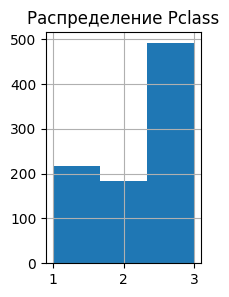

In [235]:
data['Pclass'].hist(bins=3, figsize=(2,3))
plt.title('Распределение Pclass')
plt.show()

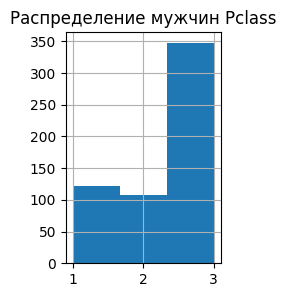

In [236]:
data[data['Sex'] == 'male']['Pclass'].hist(bins=3, figsize=(2,3))
plt.title('Распределение мужчин Pclass')
plt.show()

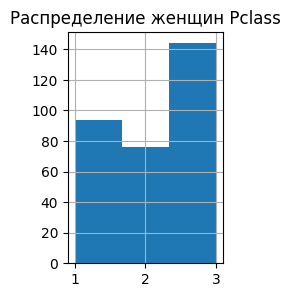

In [237]:
data[data['Sex'] == 'female']['Pclass'].hist(bins=3, figsize=(2,3))
plt.title('Распределение женщин Pclass')
plt.show()

In [238]:
(data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Pclass'].count())

108

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [239]:
median = round(data['Fare'].median(), 2)
std = round(data['Fare'].std(), 2)
print(f'Ответ: У платежей "Fare" медиана - {median}, стандартное отклонение - {std}')

Ответ: У платежей "Fare" медиана - 14.45, стандартное отклонение - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [240]:
young = data[data['Age'] < 30]['Age'].count()
old = data[data['Age'] > 60]['Age'].count()
young_alive = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Age'].count()
old_alive = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Age'].count()
young_alive = round(young_alive/young*100, 1)
old_alive = round(old_alive/old*100, 1)
if young_alive > old_alive:
    print(f'Молодые выживали чаще старых, {young_alive}% среди молодых и {old_alive}% среди старых')
else:
    print(f'Старые выживали чаще молодых, {young_alive}% среди молодых и {old_alive}% среди старых')

Молодые выживали чаще старых, 40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [241]:
male = data[data['Sex'] == 'male']['Sex'].count()
female = data[data['Sex'] == 'female']['Sex'].count()
male_alive = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Sex'].count()
female_alive = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Sex'].count()
male_alive = round(male_alive/male*100, 1)
female_alive = round(female_alive/female*100, 1)
if male_alive > female_alive:
    print(f'Мужчины выживали чаще женщин, {male_alive}% среди мужчин и {female_alive}% среди женщин')
else:
    print(f'Женщины выживали чаще мужчин, {male_alive}% среди мужчин и {female_alive}% среди женщин')

Женщины выживали чаще мужчин, 18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [242]:
names = ['Charles', 'Thomas', 'William', 'John']
mp = 0
pop_name = ''
for name in names:
    if data['Name'].str.contains(name).sum() > mp:
        mp = data['Name'].str.contains(name).sum()
        pop_name = name 
print(f'Самое популярное имя - {pop_name}')

Самое популярное имя - William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да
- Нет

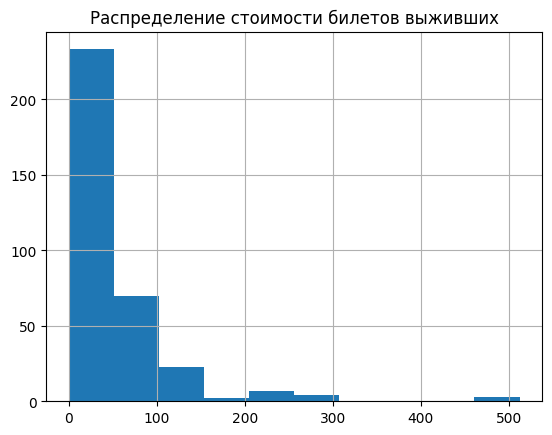

In [243]:
data[data['Survived'] == 1]['Fare'].hist()
plt.title('Распределение стоимости билетов выживших')
plt.show()

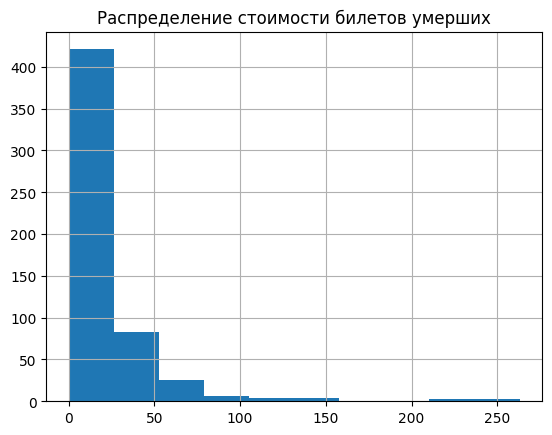

In [244]:
data[data['Survived'] == 0]['Fare'].hist()
plt.title('Распределение стоимости билетов умерших')
plt.show()

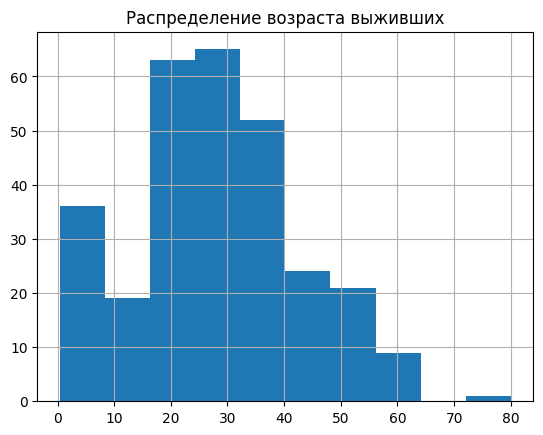

In [245]:
data[data['Survived'] == 1]['Age'].hist()
plt.title('Распределение возраста выживших')
plt.show()

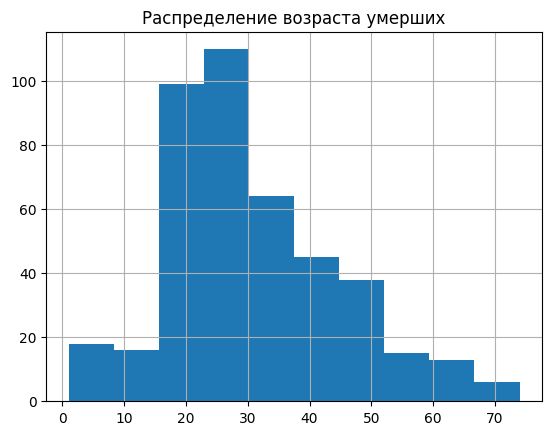

In [246]:
data[data['Survived'] == 0]['Age'].hist()
plt.title('Распределение возраста умерших')
plt.show()

In [247]:
print(f'Средний возраст умерших - {data[data['Survived'] == 0]['Age'].sum()/data[data['Survived'] == 0]['Age'].count()}')
print(f'Средний возраст выживших - {data[data['Survived'] == 1]['Age'].sum()/data[data['Survived'] == 1]['Age'].count()}')

Средний возраст умерших - 30.62617924528302
Средний возраст выживших - 28.343689655172415


**Вывод:** да

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [248]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean()

41.28138613861386

**Вывод:** В среднем мужчины 1-го класса старше 40 лет.

In [249]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean()

34.61176470588235

**Вывод:** В среднем женщины 1-го класса **не** старше 40 лет.

In [250]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'male')]['Age'].mean()

41.28138613861386

In [251]:
data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]['Age'].mean()

34.61176470588235

In [252]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')]['Age'].mean()

30.74070707070707

In [253]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]['Age'].mean()

28.722972972972972

In [254]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'male')]['Age'].mean()

26.507588932806325

In [255]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'female')]['Age'].mean()

21.75

**Вывод:** Да, мужчины всех классов в среднем старше женщин того же класса

In [256]:
data[data['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [257]:
data[data['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [258]:
data[data['Pclass'] == 3]['Age'].mean()

25.14061971830986

**Вывод:** Да, в среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса